In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import numpy as np

import sklearn 
import imblearn
import xgboost
from numpy import mean
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import joblib

In [ ]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [52]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [54]:
sklearn.__version__

'1.0.2'

In [55]:
data = pd.read_csv('data/fraudTest.csv', index_col=0)

In [56]:
data.shape

(555719, 22)

In [57]:
data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [58]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
data.dtypes

: 

In [59]:
data.columns.values

array(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'], dtype=object)

In [60]:
labels=["Genuine","Fraud"]

fraud_or_not = data["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=data['is_fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["LightGreen","Blue"]
             ,title="Fraud vs Genuine transactions")
fig.show()

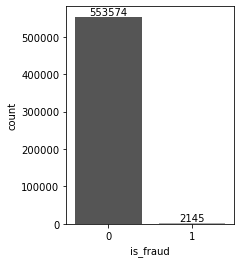

In [61]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='is_fraud',data=data,palette="gray")
for i in ax.containers:
    ax.bar_label(i,)

we have 99,6% of Genuine transactions and only 0,386%of fraud transactions

We can not use accuracy as score because of imbalanced data! Better to use F1-score or other metrics!

## Data pre-processing

In [62]:
# Drop duplicates lines : 
data.drop_duplicates(inplace=True)
data.shape

(555719, 22)

### Under-sampling Data to get balanced Dataset
 

In [83]:
# define dataset
X, y = make_classification(n_samples=100000, weights=[0.99], flip_y=0)

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.5)

In [84]:
# define pipeline
steps = [('under', undersample), ('model', XGBClassifier())]
pipeline = Pipeline(steps=steps)

# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)

print(Counter(y))
print(Counter(y_under))

Counter({0: 99000, 1: 1000})
Counter({0: 2000, 1: 1000})


In [85]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_sps = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)lits=10, n_repeats=3, random_state=1)
score
print('F1 Score: %.3f' % score)

/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 1.11854884e+00  1.06418162e+00 -6.04128585e-01 ... -1.80337770e+00
   2.60220163e-01 -1.27967845e+00]
 [ 1.16815413e+00 -6.52675217e-01 -2.56977572e-01 ... -1.30607536e+00
   1.59441831e-01 -6.91891617e-01]
 [ 1.18362735e-03 -3.60693370e-01 -4.93706209e-01 ...  8.30644043e-02
  -1.68514680e+00 -1.04341176e+00]
 ...
 [ 4.61913997e-01 -5.66721245e-01 -1.13794455e-01 ... -6.53184356e-01
  -1.30991208e+00 -3.13779674e-01]
 [-8.90053497e-01  7.26094506e-01 -9.72588239e-01 ...  2.03423973e-01
   3.66055770e-01 -2.08985256e+00]
 [ 5.97613162e-01 -2.18001386e+00 -1.19297156e+00 ...  5.15376816e-02
   1.34090810e+00  1.14517239e+00]] loaded from the file /var/folders/69/2xnjng8d15j5264htcrb3x640000gn/T/joblib_memmapping_folder_51026_ee0f806f3c1e4ab3ae7f57439bf69319_43d7124851234eecb6fa0a1eeeab0b13/51026-140274809557392-4cc69c3417aa4f06b8e3669e926ee292.pkl is not not bytes aligned. This may

F1 Score: 0.977


In [98]:
from sklearn.model_selection import train_test_split
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, stratify=y_under, test_size = 0.2)

Dividing into train and test sets...


In [99]:
model = Pipeline(steps=[
        ("Classifier",XGBClassifier(enable_categorical=True))
    ])

In [101]:
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("f1-score on train set : ", f1_score(y_train, train_pred))
print("f1-score on test set : ", f1_score(y_test, test_pred))

f1-score on train set :  1.0
f1-score on test set :  0.9365079365079365


## Preparing the API

In [103]:
from joblib import dump, load
dump(model, 'model_xg.joblib')

['model_xg.joblib']

In [80]:
predictionFeatures = { }

In [81]:
data = pd.DataFrame(dict(predictionFeatures), index=[0])
data

""
0


In [ ]:
loaded_model = load('model_xg.joblib')

In [ ]:
prediction = loaded_model.predict(data)
response = {"predictions": prediction.tolist()[0]}